Bacha: nemělo by se to, ale df v druhé půlce je jiný dataframe než v první, takže spouštět nejlépe jenom celé.

In [2]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

## I. Do 4 hodin do odjezdu

In [5]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)
df[df['oscrapovano'] <= '2024-12-01']

Nejdelší započítané spojení: 255 minut.


,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi
143545,2024-11-08 08:03:15,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 08:19:00,0 days 00:15:45,0,0.262500,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[],None,pá,0,[EC 141 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 08:19,5-2
144833,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 14:19:00,0 days 05:25:19,0,5.421944,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 117 Silesia],True,None,NaN,NaN,NaN,NaN,ČD pá 14:19,5-3
144834,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 10:19:00,0 days 01:25:19,0,1.421944,609.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,209.0,356.0,[0],None,pá,0,[EC 115 Cracovia],True,None,NaN,NaN,NaN,NaN,ČD pá 10:19,5-2
144835,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 11:32:00,0 days 02:38:19,0,2.638611,689.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,192.0,356.0,[0],None,pá,0,[SC 505 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 11:32,5-2
144836,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 12:19:00,0 days 03:25:19,0,3.421944,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 143 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:19,5-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998170,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 12:04:00,9 days 12:43:44,9,228.728889,199.0,None,46.0,None,204.0,351.0,None,None,út,0,[LE1256],None,None,21.0,13.0,8.0,4.0,LE út 12:04,2-3
998171,2024-11-30 23:20:16,LE,Ostrava hl.n.,Praha hl.n.,2024-12-10 18:57:00,9 days 19:36:44,9,235.612222,169.0,None,66.0,None,211.0,356.0,None,None,út,0,[LE1262],None,None,21.0,21.0,18.0,6.0,LE út 18:57,2-4
998172,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 16:04:00,9 days 16:43:44,9,232.728889,299.0,None,58.0,None,204.0,351.0,None,None,út,0,[LE1260],None,None,21.0,18.0,15.0,4.0,LE út 16:04,2-4
998173,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 19:04:00,9 days 19:43:44,9,235.728889,169.0,None,66.0,None,204.0,351.0,None,None,út,0,[LE1262],None,None,21.0,21.0,18.0,6.0,LE út 19:04,2-4


In [6]:
df = df[df['predstih_h'] <= 4]
df = df[df['predstih_h'] >= 0]

In [7]:
prgova = df[df['odkud'].str.contains('Pra') & df['kam'].str.contains('Ostra')]

In [8]:
ovaprg = df[df['odkud'].str.contains('Ostra') & df['kam'].str.contains('Pra')]

<Axes: xlabel='obdobi'>

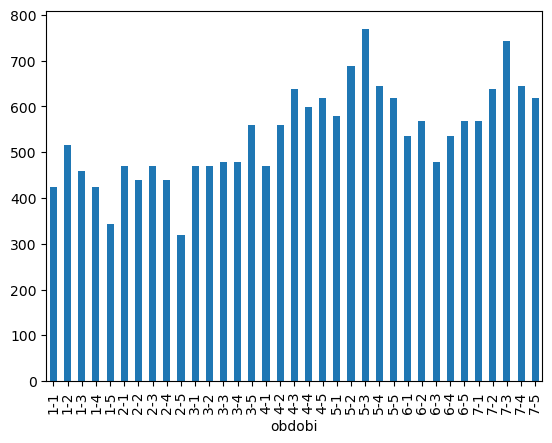

In [9]:
prgova.groupby('obdobi')['cena'].median().plot.bar()

<Axes: xlabel='obdobi'>

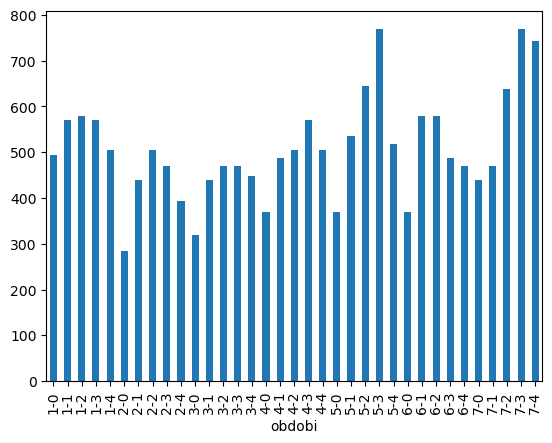

In [10]:
ovaprg.groupby('obdobi')['cena'].median().plot.bar()

In [11]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3     4.0
5-3     9.5
7-4    18.5
5-2    20.0
4-3    22.5
5-4    28.0
7-5    31.0
3-3    32.0
4-5    32.0
6-2    33.0
Name: volnych_mist, dtype: float64

In [12]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3    13.0
5-2    14.0
5-3    18.0
7-4    19.0
5-1    20.0
7-2    29.0
4-2    30.5
6-2    30.5
3-2    31.0
4-3    31.0
Name: volnych_mist, dtype: float64

In [13]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    769.0
7-3    744.0
5-2    689.0
5-4    644.0
7-4    644.0
4-3    639.0
7-2    639.0
4-5    619.0
5-5    619.0
7-5    619.0
Name: cena, dtype: float64

In [14]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    769.0
7-3    769.0
7-4    744.0
5-2    644.0
7-2    639.0
1-2    579.0
6-1    579.0
6-2    579.0
1-1    570.0
1-3    570.0
Name: cena, dtype: float64

In [15]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['cena'].median().nsmallest(10)

obdobi
2-0    284.0
3-0    319.0
4-0    369.0
5-0    369.0
6-0    369.0
2-4    394.0
2-1    439.0
3-1    439.0
7-0    439.0
3-4    447.0
Name: cena, dtype: float64

In [16]:
df.groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    769.0
7-3    769.0
5-2    689.0
7-4    679.0
7-2    639.0
4-5    619.0
5-4    619.0
5-5    619.0
7-5    619.0
4-3    604.0
Name: cena, dtype: float64

In [17]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(20)

obdobi
7-3     2.00
5-3     6.00
5-2     7.00
7-4    10.00
5-1    17.48
4-3    20.80
5-4    23.00
7-2    25.00
6-2    29.00
4-2    30.00
4-5    30.00
7-5    30.00
1-0    30.65
3-3    31.46
3-2    32.00
6-1    32.58
4-4    33.00
5-5    33.00
1-2    33.76
3-5    34.00
Name: volnych_mist, dtype: float64

In [18]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(10)

obdobi
7-3     2.00
5-3     6.00
5-2     7.00
7-4    10.00
5-1    17.48
4-3    20.80
5-4    23.00
7-2    25.00
6-2    29.00
4-2    30.00
Name: volnych_mist, dtype: float64

In [19]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nlargest(10)

obdobi
2-1    116.20
1-1     99.44
4-0     81.40
5-0     76.16
3-1     72.03
4-1     57.00
2-4     54.50
7-1     51.34
3-0     49.92
3-4     49.45
Name: volnych_mist, dtype: float64

In [20]:
spicka = df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(4).index.to_list()

In [70]:
spicka

['7-3', '5-3', '5-2', '7-4']

## II. Kdykoliv

In [22]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)
df[df['oscrapovano'] <= '2024-12-01']

Nejdelší započítané spojení: 255 minut.


,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi
143545,2024-11-08 08:03:15,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 08:19:00,0 days 00:15:45,0,0.262500,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[],None,pá,0,[EC 141 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 08:19,5-2
144833,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 14:19:00,0 days 05:25:19,0,5.421944,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 117 Silesia],True,None,NaN,NaN,NaN,NaN,ČD pá 14:19,5-3
144834,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 10:19:00,0 days 01:25:19,0,1.421944,609.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,209.0,356.0,[0],None,pá,0,[EC 115 Cracovia],True,None,NaN,NaN,NaN,NaN,ČD pá 10:19,5-2
144835,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 11:32:00,0 days 02:38:19,0,2.638611,689.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,192.0,356.0,[0],None,pá,0,[SC 505 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD pá 11:32,5-2
144836,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 12:19:00,0 days 03:25:19,0,3.421944,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[0],None,pá,0,[EC 143 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 12:19,5-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998170,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 12:04:00,9 days 12:43:44,9,228.728889,199.0,None,46.0,None,204.0,351.0,None,None,út,0,[LE1256],None,None,21.0,13.0,8.0,4.0,LE út 12:04,2-3
998171,2024-11-30 23:20:16,LE,Ostrava hl.n.,Praha hl.n.,2024-12-10 18:57:00,9 days 19:36:44,9,235.612222,169.0,None,66.0,None,211.0,356.0,None,None,út,0,[LE1262],None,None,21.0,21.0,18.0,6.0,LE út 18:57,2-4
998172,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 16:04:00,9 days 16:43:44,9,232.728889,299.0,None,58.0,None,204.0,351.0,None,None,út,0,[LE1260],None,None,21.0,18.0,15.0,4.0,LE út 16:04,2-4
998173,2024-11-30 23:20:16,LE,Ostrava-Svinov,Praha hl.n.,2024-12-10 19:04:00,9 days 19:43:44,9,235.728889,169.0,None,66.0,None,204.0,351.0,None,None,út,0,[LE1262],None,None,21.0,21.0,18.0,6.0,LE út 19:04,2-4


In [76]:
df.sort_values(by='cena',ascending=False).head(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_d2
520292,2024-11-17 12:12:56,LE,Praha hl.n.,Ostrava-Svinov,2024-11-17 13:00:00,0 days 00:47:04,0,0.784444,2279.0,None,1.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,0.032685
520291,2024-11-17 12:12:56,LE,Praha hl.n.,Ostrava hl.n.,2024-11-17 13:00:00,0 days 00:47:04,0,0.784444,2279.0,None,1.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,0.032685
960933,2024-11-29 17:13:21,LE,Praha hl.n.,Ostrava-Svinov,2024-12-01 13:00:00,1 days 19:46:39,1,43.777500,2279.0,None,1.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,1.824063
960941,2024-11-29 17:13:21,LE,Praha hl.n.,Ostrava hl.n.,2024-12-01 13:00:00,1 days 19:46:39,1,43.777500,2279.0,None,1.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,0.0,1.0,LE ne 13:00,7-3,1.824063
617098,2024-11-19 22:24:31,LE,Praha hl.n.,Ostrava hl.n.,2024-12-01 13:00:00,11 days 14:35:29,11,278.591389,1939.0,None,3.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,2.0,LE ne 13:00,7-3,11.607975
588813,2024-11-19 08:19:45,LE,Praha hl.n.,Ostrava hl.n.,2024-12-08 13:00:00,19 days 04:40:15,19,460.670833,1939.0,None,2.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,1.0,LE ne 13:00,7-3,19.194618
617097,2024-11-19 22:24:31,LE,Praha hl.n.,Ostrava-Svinov,2024-12-01 13:00:00,11 days 14:35:29,11,278.591389,1939.0,None,3.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,2.0,LE ne 13:00,7-3,11.607975
588817,2024-11-19 08:19:45,LE,Praha hl.n.,Ostrava-Svinov,2024-12-08 13:00:00,19 days 04:40:15,19,460.670833,1939.0,None,2.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,1.0,LE ne 13:00,7-3,19.194618
1004552,2024-12-01 07:14:30,LE,Praha hl.n.,Ostrava hl.n.,2024-12-01 13:00:00,0 days 05:45:30,0,5.758333,1879.0,None,3.0,None,211.0,356.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,2.0,LE ne 13:00,7-3,0.239931
1010404,2024-12-01 11:12:10,LE,Praha hl.n.,Ostrava-Svinov,2024-12-01 13:00:00,0 days 01:47:50,0,1.797222,1879.0,None,3.0,None,204.0,351.0,None,None,ne,0,[LE1259],None,None,0.0,0.0,1.0,2.0,LE ne 13:00,7-3,0.074884


"Pro srovnání: střední cena jízdenky poptávané kdykoliv během týdne do 24 hodin před odjezdem je …"

In [68]:
df[(df['predstih_h'] <= 24) & (df['odjezd'] >= '2024-11-11') & (df['odjezd'] <= '2024-12-01')]['cena'].median()

514.0

In [25]:
(df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_3720\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)
C:\Users\micha\AppData\Local\Temp\ipykernel_3720\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)


spoj         kam           
LE ne 10:58  Ostrava hl.n.     7.767677
             Ostrava-Svinov    7.767677
LE ne 08:58  Ostrava hl.n.     5.646465
             Ostrava-Svinov    5.646465
LE čt 13:58  Ostrava hl.n.     5.581006
             Ostrava-Svinov    5.413408
LE ne 07:58  Ostrava hl.n.     5.040404
             Ostrava-Svinov    5.040404
LE po 17:06  Praha hl.n.       5.040404
LE po 17:13  Praha hl.n.       5.040404
Name: cena, dtype: float64

In [26]:
df = df[df['predstih_h'] >= 0]

In [27]:
df['predstih_d2'] = df['predstih_h'] / 24

In [28]:
df.sample(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_d2
247062,2024-11-10 13:54:04,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-26 05:19:00,15 days 15:24:56,15,375.415556,289.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",224.0,356.0,"[0, 0]",None,út,1,"[EC 121 Valašský expres, EC 108 Sobieski]",True,None,NaN,NaN,NaN,NaN,ČD út 05:19,2-1,15.642315
962155,2024-11-29 18:40:13,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-02 16:12:00,2 days 21:31:47,2,69.529722,469.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,202.0,356.0,[0],None,po,0,[EC 140 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD po 16:12,1-4,2.897072
902470,2024-11-28 04:31:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-28 22:14:00,0 days 17:42:19,0,17.705278,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,236.0,356.0,[0],None,čt,0,[EN 443 Slovakia],None,None,NaN,NaN,NaN,NaN,ČD čt 22:14,4-5,0.737720
537954,2024-11-17 21:52:39,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-29 09:10:00,11 days 11:17:21,11,275.289167,604.0,vlak,NaN,[Předpokládané nízké obsazení],189.0,356.0,[0],None,pá,0,[IC 510 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD pá 09:10,5-2,11.470382
415586,2024-11-14 19:07:35,RJ,Praha,Ostrava,2024-11-22 15:50:00,7 days 20:42:25,7,188.706944,639.0,vlak,45.0,None,191.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 15:50,5-3,7.862789
894632,2024-11-27 20:30:36,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-28 08:12:00,0 days 11:41:24,0,11.690000,469.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,202.0,356.0,[0],None,čt,0,[EC 144 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD čt 08:12,4-2,0.487083
947916,2024-11-29 08:53:22,ČD,Ostrava hl.n.,Praha hl.n.,2025-02-05 10:51:00,68 days 01:57:38,68,1633.960556,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,225.0,356.0,"[0, 0]",None,st,1,"[EC 105 Polonia, EC 128 Valašský expres]",None,None,NaN,NaN,NaN,NaN,ČD st 10:51,3-2,68.081690
750619,2024-11-23 12:01:41,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-25 07:10:00,31 days 19:08:19,31,763.138611,584.0,vlak,NaN,[Předpokládané nízké obsazení],194.0,356.0,[0],None,st,0,[IC 512 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD st 07:10,3-1,31.797442
214489,2024-11-09 18:09:24,RJ,Praha,Ostrava,2024-11-14 09:50:00,4 days 15:40:36,4,111.676667,369.0,vlak,188.0,None,191.0,NaN,None,None,čt,0,None,None,None,NaN,NaN,NaN,NaN,RJ čt 09:50,4-2,4.653194
335967,2024-11-12 21:49:07,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-19 10:19:00,6 days 12:29:53,6,156.498056,469.0,vlak,NaN,[Předpokládané nízké obsazení],209.0,356.0,[0],None,út,0,[EC 115 Cracovia],True,None,NaN,NaN,NaN,NaN,ČD út 10:19,2-2,6.520752


In [29]:
def dopravce(dopr):
    if dopr == "ČD":
        dlouhe = "České dráhy"
    elif dopr == "RJ":
        dlouhe = "RegioJet"
    elif dopr == "LE":
        dlouhe = "Leo Express"
    x = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60) & (df['prodejce'] == dopr)].groupby(['predstih_d','cena']).size().reset_index()
    x = x[['predstih_d','cena', 0]].values.tolist()
    x = pd.Series(x, name=dlouhe)
    x.index = x.index.map(lambda x: f"{x} d")
    return x

In [30]:
cd = dopravce("ČD")
le = dopravce("LE")
rj = dopravce("RJ")

<Axes: xlabel='predstih_d2', ylabel='cena'>

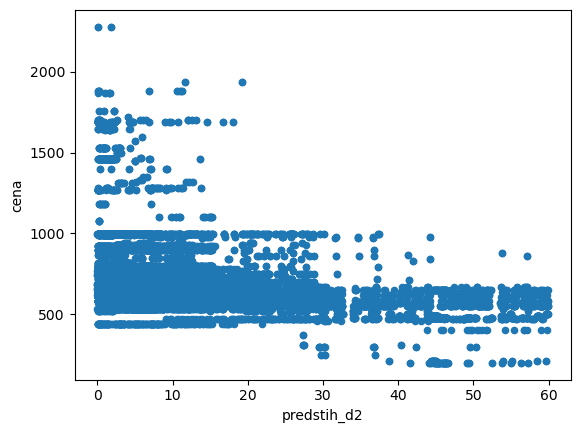

In [31]:
df[df['obdobi'].isin(spicka) & (df['predstih_d2'] <= 60)][['prodejce','predstih_d2','cena']].plot.scatter(x='predstih_d2', y='cena')

In [32]:
cd

0 d       [0.0, 535.0, 42.0]
1 d        [0.0, 569.0, 4.0]
2 d       [0.0, 604.0, 10.0]
3 d      [0.0, 609.0, 177.0]
4 d      [0.0, 619.0, 375.0]
                ...         
670 d     [59.0, 649.0, 8.0]
671 d     [60.0, 469.0, 2.0]
672 d     [60.0, 549.0, 2.0]
673 d     [60.0, 619.0, 3.0]
674 d     [60.0, 649.0, 1.0]
Name: České dráhy, Length: 675, dtype: object

Strašlivá ad hoc úprava funkce pro generování grafu:

In [34]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    scatter=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti=[],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.series.bubble import BubbleSeries
    from highcharts_core.options.plot_options.scatter import ScatterOptions
    from highcharts_core.options.plot_options.bubble import BubbleOptions
    from highcharts_core.options.series.scatter import ScatterSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><script src="https://code.highcharts.com/highcharts-more.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>
<link
  rel="stylesheet"
  href="https://fonts.googleapis.com/css?family=Noticia+Text"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Asap"
  rel="stylesheet"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Roboto"
  rel="stylesheet"
/>

<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/style.css"
/>
<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/highcharts-style.css"
/>
<style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()
    if len(scatter) > 0:
        categories = scatter[0].index.to_list()

    categories = [str(x) for x in categories]
    
    nastaveni["xAxis"] = {"categories": categories, "min": 0, "title": {"text": "předstih nákupu"}}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0

    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y = {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0,
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa

            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )

            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                        tooltip = {
				'pointFormat': '{point.x}denní předstih: {point.y} Kč, nabídnuto {point.z}×'
			}
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)
    if len(scatter) > 0:
        vykresleni(scatter, BubbleSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [35]:
spicka

['7-3', '5-3', '5-2', '7-4']

In [74]:
irozhlas_graf(scatter=[cd, rj, le], barvy=["#526d77","#fabb00","#e68014"], target='prgova_bubble', titulek='Jízdné Praha &#8596; Ostrava na začátku a konci víkendu', osaymin=0, podtitulek='Nabízené ceny jízdenek na páteční (8-16 h) a nedělní (12-20 h) špičku. Od 14. dne dál se do dat promítají prosincové změny jízdních řádů a zdražení části spojů.', kredity=['Zdroj dat: e-shopy dopravců od 7. 11. do 1. 12. 2024. Vizualizace: iROZHLAS.cz','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika'])

Graf uložen.
